<div style="background-color: orange">
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle Data</a></li>
<li><a href='#modelsdict'>Models Dictionary Creation</a></li>
<li><a href='#baseline'>Baseline Creation</a></li>
<li><a href='#lists'>Obtain Lists of Columns for Modeling</a></li>
<li><a href='#dtc'>Decision Tree Classifier</a></li>
<li><a href='#rfc'>Random Forest Classifier</a></li>
<li><a href='#best'>Best Accuracy and Best Recall Models</a></li>
<li><a href='#misc'>Miscellaneous</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [60]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Classification Models
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC

# Model Metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score

#.py Files
import wrangle as w
import explore as e

<div style='background-color: orange'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align: center'>
        Wrangle Data
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [2]:
# Wrangle and split the mass_shooters data for proper
# modeling purposes
train, validate, test = w.wrangle_mass_shooters()

In [3]:
# Verify split data
train.shape, validate.shape, test.shape

((131, 254), (38, 254), (19, 254))

<div style='background-color: orange'>
<a id='modelsdict'></a>
    <b><u><i><h1 style='text-align: center'>
        Models Dictionary Creation
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [4]:
# Create a dictionary that holds all the models for 
# easier comparison purposes...
models_dict = {
    'model_name' : [],
    'model_type' : [],
    'model_descriptor' : [],
    'accuracy_train' : [],
    'accuracy_val' : [],
    'accuracy_diff' : [],
    'recall_variable' : [],
    'recall_train' : [],
    'recall_val' : [],
    'recall_diff' : []
}

<div style='background-color: orange'>
<a id='baseline'></a>
    <b><u><i><h1 style='text-align: center'>
        Baseline Creation
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [5]:
# Target value is 'shooter_volatility', thus create
# baseline with mode value ('Low Volatility')
baseline_train = round((train.shooter_volatility == train.shooter_volatility.mode()[0]).sum() / train.shape[0], 3)
baseline_val = round((validate.shooter_volatility == validate.shooter_volatility.mode()[0]).sum() / validate.shape[0], 3)

# Append to 'models_dict'
models_dict['model_name'].append('Baseline')
models_dict['model_type'].append('Baseline')
models_dict['model_descriptor'].append('Mode = Low Volatility')
models_dict['accuracy_train'].append(baseline_train)
models_dict['accuracy_val'].append(baseline_val)
models_dict['accuracy_diff'].append(baseline_val - baseline_train)
models_dict['recall_variable'].append('High Volatility')
models_dict['recall_train'].append(0.000)
models_dict['recall_val'].append(0.000)
models_dict['recall_diff'].append(0.000)

In [6]:
# Check models_dict via pd.DataFrame
pd.DataFrame(models_dict)

,model_name,model_type,model_descriptor,accuracy_train,accuracy_val,accuracy_diff,recall_variable,recall_train,recall_val,recall_diff
0,Baseline,Baseline,Mode = Low Volatility,0.634,0.632,-0.002,High Volatility,0.0,0.0,0.0


<div style='background-color: orange'>
<a id='lists'></a>
    <b><u><i><h1 style='text-align: center'>
        Obtain Lists of Columns For Modeling
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#listsbinary'>Get Binary Columns</a></li>
<li><a href='#listsbinarycombo'>Combine Binary Columns</a></li>
<li><a href='#listsagg'>Get Aggregate Columns</a></li>
<li><a href='#listssummary'>Summary of Lists</a></li>

<a id='listsbinary'></a>
<h5><b><i>
    Get Binary Columns
</i></b></h5>
<li><a href='#lists'>Obtain Lists of Columns for Modeling Top</a></li>

In [7]:
# Obtain the 4 unique binary column lists from exploration
zero_high, zero_low, one_high, one_low = e.binary_list()

In [8]:
# Confirm lists are of the same lengths
len(zero_high), len(zero_low), len(one_high), len(one_low)

(1, 14, 8, 9)

---

<a id='listsbinarycombo'></a>
<h5><b><i>
    Combine Binary Columns
</i></b></h5>
<li><a href='#lists'>Obtain Lists of Columns for Modeling Top</a></li>

In [9]:
# Combine binary columns for further modeling
zero_all = zero_high + zero_low
one_all = one_high + one_low
high_only = zero_high + one_high
low_only = zero_low + one_low
all_binary = zero_all + one_all

In [10]:
# Confirm combination of lists
print(zero_all == zero_high + zero_low)
print(one_all == one_high + one_low)
print(high_only == zero_high + one_high)
print(low_only == zero_low + one_low)
print(all_binary == zero_all + one_all)

True
True
True
True
True


---

<a id='listsagg'></a>
<h5><b><i>
    Get Aggregate Columns
</i></b></h5>
<li><a href='#lists'>Obtain Lists of Columns for Modeling Top</a></li>

In [11]:
# Obtain aggregate column list from exploration
agg_list = e.agg_list()

In [12]:
# Confirm list are of the same length
len(agg_list)

6

In [13]:
# Remove target column leakage
agg_list = [name for name in agg_list if name != 'agg_casualties']

In [14]:
# Confirm removal
agg_list

['agg_motivation_hatred',
 'agg_trauma',
 'agg_background',
 'agg_crime',
 'agg_prejudice']

---

<a id='listssummary'></a>
<h5><b><i>
    Summary of Lists
</i></b></h5>
<li><a href='#lists'>Obtain Lists of Columns for Modeling Top</a></li>

In [15]:
# Create dictionary for iteration purposes
dictionary_list = {
    'zero_high' : zero_high,
    'zero_low' : zero_low,
    'one_high' : one_high,
    'one_low' : one_low,
    'zero_all' : zero_all,
    'one_all' : one_all,
    'high_only' : high_only,
    'low_only' : low_only,
    'all_binary' : all_binary,
    'agg_list' : agg_list
}

- Binary
    - zero_high == 1
    - zero_low == 14
    - one_high == 8
    - one_low == 9
- Combine Binary
    - zero_all == 15
    - one_all == 17
    - high_only == 9
    - low_only == 23
    - all_binary == 32
- Aggregate
    - agg_list == 6

<div style='background-color: orange'>
<a id='dtc'></a>
    <b><u><i><h1 style='text-align: center'>
        Decision Tree Classifier
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [16]:
# Make, fit, and use the Decision Tree Classifier
# on all lists generated
n = 0
for list in dictionary_list:
    dtc = DTC(max_depth=3, random_state=1349, ccp_alpha=0.02)
    dtc.fit(train[dictionary_list[list]], train.shooter_volatility)
    train_preds = dtc.predict(train[dictionary_list[list]])
    val_preds = dtc.predict(validate[dictionary_list[list]])
    train_accuracy = round(accuracy_score(train.shooter_volatility, train_preds), 3)
    val_accuracy = round(accuracy_score(validate.shooter_volatility, val_preds), 3)
    accuracy_diff = val_accuracy - train_accuracy
    train_recall = round(recall_score(train.shooter_volatility, train_preds, pos_label='High Volatility'), 3)
    val_recall = round(recall_score(validate.shooter_volatility, val_preds, pos_label='High Volatility'), 3)
    recall_diff = val_recall - train_recall
    n += 1
    models_dict['model_name'].append(f'DTC{n}')
    models_dict['model_type'].append('Decision Tree Classifier')
    models_dict['model_descriptor'].append(list)
    models_dict['accuracy_train'].append(train_accuracy)
    models_dict['accuracy_val'].append(val_accuracy)
    models_dict['accuracy_diff'].append(accuracy_diff)
    models_dict['recall_variable'].append('High Volatility')
    models_dict['recall_train'].append(train_recall)
    models_dict['recall_val'].append(val_recall)
    models_dict['recall_diff'].append(recall_diff)

In [17]:
# Verify models were appended properly
pd.DataFrame(models_dict)

,model_name,model_type,model_descriptor,accuracy_train,accuracy_val,accuracy_diff,recall_variable,recall_train,recall_val,recall_diff
0,Baseline,Baseline,Mode = Low Volatility,0.634,0.632,-0.002,High Volatility,0.000,0.000,0.000
1,DTC1,Decision Tree Classifier,zero_high,0.710,0.632,-0.078,High Volatility,0.312,0.286,-0.026
2,DTC2,Decision Tree Classifier,zero_low,0.725,0.605,-0.120,High Volatility,0.792,0.500,-0.292
3,DTC3,Decision Tree Classifier,one_high,0.763,0.684,-0.079,High Volatility,0.479,0.286,-0.193
4,DTC4,Decision Tree Classifier,one_low,0.725,0.658,-0.067,High Volatility,0.562,0.643,0.081
5,DTC5,Decision Tree Classifier,zero_all,0.802,0.763,-0.039,High Volatility,0.521,0.571,0.050
6,DTC6,Decision Tree Classifier,one_all,0.763,0.684,-0.079,High Volatility,0.688,0.714,0.026
7,DTC7,Decision Tree Classifier,high_only,0.771,0.658,-0.113,High Volatility,0.500,0.357,-0.143
8,DTC8,Decision Tree Classifier,low_only,0.733,0.579,-0.154,High Volatility,0.917,0.643,-0.274
9,DTC9,Decision Tree Classifier,all_binary,0.733,0.579,-0.154,High Volatility,0.917,0.643,-0.274


<div style='background-color: orange'>
<a id='rfc'></a>
    <b><u><i><h1 style='text-align: center'>
        Random Forest Classifier
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [18]:
# Make, fit, and use the Random Forest Classifier
# on all lists generated
n = 0
for list in dictionary_list:
    rfc = RFC(max_depth=3, random_state=1349, ccp_alpha=0.02)
    rfc.fit(train[dictionary_list[list]], train.shooter_volatility)
    train_preds = rfc.predict(train[dictionary_list[list]])
    val_preds = rfc.predict(validate[dictionary_list[list]])
    train_accuracy = round(accuracy_score(train.shooter_volatility, train_preds), 3)
    val_accuracy = round(accuracy_score(validate.shooter_volatility, val_preds), 3)
    accuracy_diff = val_accuracy - train_accuracy
    train_recall = round(recall_score(train.shooter_volatility, train_preds, pos_label='High Volatility'), 3)
    val_recall = round(recall_score(validate.shooter_volatility, val_preds, pos_label='High Volatility'), 3)
    recall_diff = val_recall - train_recall
    n += 1
    models_dict['model_name'].append(f'RFC{n}')
    models_dict['model_type'].append('Random Forest Classifier')
    models_dict['model_descriptor'].append(list)
    models_dict['accuracy_train'].append(train_accuracy)
    models_dict['accuracy_val'].append(val_accuracy)
    models_dict['accuracy_diff'].append(accuracy_diff)
    models_dict['recall_variable'].append('High Volatility')
    models_dict['recall_train'].append(train_recall)
    models_dict['recall_val'].append(val_recall)
    models_dict['recall_diff'].append(recall_diff)

In [19]:
# Verify models were appended properly
pd.DataFrame(models_dict)

,model_name,model_type,model_descriptor,accuracy_train,accuracy_val,accuracy_diff,recall_variable,recall_train,recall_val,recall_diff
0,Baseline,Baseline,Mode = Low Volatility,0.634,0.632,-0.002,High Volatility,0.000,0.000,0.000
1,DTC1,Decision Tree Classifier,zero_high,0.710,0.632,-0.078,High Volatility,0.312,0.286,-0.026
2,DTC2,Decision Tree Classifier,zero_low,0.725,0.605,-0.120,High Volatility,0.792,0.500,-0.292
3,DTC3,Decision Tree Classifier,one_high,0.763,0.684,-0.079,High Volatility,0.479,0.286,-0.193
4,DTC4,Decision Tree Classifier,one_low,0.725,0.658,-0.067,High Volatility,0.562,0.643,0.081
5,DTC5,Decision Tree Classifier,zero_all,0.802,0.763,-0.039,High Volatility,0.521,0.571,0.050
6,DTC6,Decision Tree Classifier,one_all,0.763,0.684,-0.079,High Volatility,0.688,0.714,0.026
7,DTC7,Decision Tree Classifier,high_only,0.771,0.658,-0.113,High Volatility,0.500,0.357,-0.143
8,DTC8,Decision Tree Classifier,low_only,0.733,0.579,-0.154,High Volatility,0.917,0.643,-0.274
9,DTC9,Decision Tree Classifier,all_binary,0.733,0.579,-0.154,High Volatility,0.917,0.643,-0.274


<div style='background-color: orange'>
<a id='best'></a>
    <b><u><i><h1 style='text-align: center'>
        Best Accuracy and Best Recall Model
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [20]:
# Determine best model as well as explainability (RFC6)
models = pd.DataFrame(models_dict)
models.sort_values(by='accuracy_diff', ascending=False)

,model_name,model_type,model_descriptor,accuracy_train,accuracy_val,accuracy_diff,recall_variable,recall_train,recall_val,recall_diff
18,RFC8,Random Forest Classifier,low_only,0.779,0.816,0.037,High Volatility,0.521,0.571,0.050
19,RFC9,Random Forest Classifier,all_binary,0.794,0.816,0.022,High Volatility,0.521,0.571,0.050
0,Baseline,Baseline,Mode = Low Volatility,0.634,0.632,-0.002,High Volatility,0.000,0.000,0.000
14,RFC4,Random Forest Classifier,one_low,0.748,0.737,-0.011,High Volatility,0.479,0.571,0.092
16,RFC6,Random Forest Classifier,one_all,0.802,0.789,-0.013,High Volatility,0.542,0.429,-0.113
5,DTC5,Decision Tree Classifier,zero_all,0.802,0.763,-0.039,High Volatility,0.521,0.571,0.050
13,RFC3,Random Forest Classifier,one_high,0.779,0.737,-0.042,High Volatility,0.438,0.357,-0.081
20,RFC10,Random Forest Classifier,agg_list,0.763,0.711,-0.052,High Volatility,0.479,0.429,-0.050
15,RFC5,Random Forest Classifier,zero_all,0.817,0.763,-0.054,High Volatility,0.542,0.500,-0.042
12,RFC2,Random Forest Classifier,zero_low,0.824,0.763,-0.061,High Volatility,0.604,0.500,-0.104


In [35]:
# Get Model Score (DTC6)
dtc = DTC(max_depth=3, random_state=1349, ccp_alpha=0.02)
dtc.fit(train[one_all], train.shooter_volatility)
preds = dtc.predict(test[one_all])
acc = round(accuracy_score(test.shooter_volatility, preds), 3)
recall = round(recall_score(test.shooter_volatility, preds, pos_label='High Volatility'), 3)
acc, recall

(0.632, 0.429)

In [23]:
# Get Baseline scores
round((test.shooter_volatility == 'Low Volatility').sum() / test.shape[0], 3)

0.632

In [26]:
# Create dictionary of best models
best_models_dict = {
    'model_name' : ['Baseline', 'DTC6'],
    'model_type' : ['Baseline', 'Decision Tree Classifier'],
    'model_descriptor' : ['mode == "Low Volatility"', 'one_all'],
    'accuracy' : [0.632, 0.632],
    'recall_pos_label' : ['High Volatility', 'High Volatility'],
    'recall' : [0.000, 0.429]
}
pd.DataFrame(best_models_dict)

,model_name,model_type,model_descriptor,accuracy,recall_pos_label,recall
0,Baseline,Baseline,"mode == ""Low Volatility""",0.632,High Volatility,0.000
1,DTC6,Decision Tree Classifier,one_all,0.632,High Volatility,0.429


<div style='background-color: orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align: center'>
        Miscellaneous
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [45]:
agg_list

['agg_motivation_hatred',
 'agg_trauma',
 'agg_background',
 'agg_crime',
 'agg_prejudice']

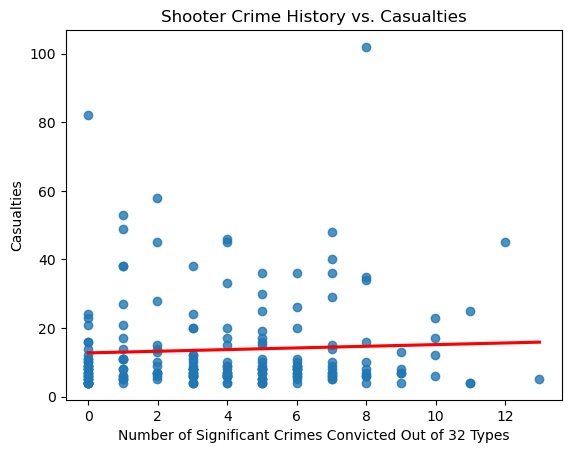

In [58]:
# 4th Visual for 'final_report.ipynb'
full = w.prepare_mass_shooters()
removed_outlier = full[full.agg_casualties != 927]
removed_outlier['agg_crime'] = removed_outlier['agg_crime'] * 32
sns.regplot(data=removed_outlier, x='agg_crime', y='agg_casualties', ci=0, line_kws={'color' : 'red'})
plt.title('Shooter Crime History vs. Casualties')
plt.xlabel('Number of Significant Crimes Convicted Out of 32 Types')
plt.ylabel('Casualties')
plt.show()

In [68]:
# 1st Stat for 4th visual
full = w.prepare_mass_shooters()
removed_outlier = full[full.agg_casualties != 927]
removed_outlier['agg_crime'] = removed_outlier['agg_crime'] * 32
target_binary = np.where(removed_outlier.shooter_volatility == 'High Volatility', 1, 0)
target_mean = sum(target_binary) / removed_outlier.shape[0]
non_target_mean = removed_outlier.agg_crime.mean()
stat, p = stats.ttest_ind_from_stats(mean1=target_mean, std1=1, nobs1=removed_outlier.shape[0],
                           mean2=non_target_mean, std2=1, nobs2=removed_outlier.shape[0],
                           equal_var=False)
if p < 0.05:
    print(f'\033[32m========== REJECT NULL HYPOTHESIS! ==========\033[0m')
    print(f'\033[35mStatistic:\033[0m {stat:.4f}')
    print(f'\033[35mP-Value:\033[0m {p:.4f}')
else:
    print(f'\033[31m========== ACCEPT NULL HYPOTHESIS! ==========\033[0m')
    print(f'\033[35mStatistic:\033[0m {stat:.4f}')
    print(f'\033[35mP-Value:\033[0m {p:.4f}')

========== REJECT NULL HYPOTHESIS! ==========
Statistic: -34.4356
P-Value: 0.0000


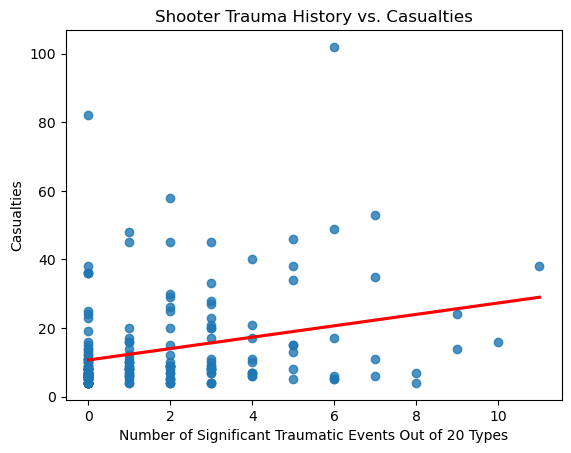

In [69]:
# 5th Visual for 'final_report.ipynb'
full = w.prepare_mass_shooters()
removed_outlier = full[full.agg_casualties != 927]
removed_outlier['agg_trauma'] = removed_outlier['agg_trauma'] * 20
sns.regplot(data=removed_outlier, x='agg_trauma', y='agg_casualties', ci=0, line_kws={'color' : 'red'})
plt.title('Shooter Trauma History vs. Casualties')
plt.xlabel('Number of Significant Traumatic Events Out of 20 Types')
plt.ylabel('Casualties')
plt.show()

In [70]:
# 2nd Stat for 5th visual
full = w.prepare_mass_shooters()
removed_outlier = full[full.agg_casualties != 927]
removed_outlier['agg_trauma'] = removed_outlier['agg_trauma'] * 20
target_binary = np.where(removed_outlier.shooter_volatility == 'High Volatility', 1, 0)
target_mean = sum(target_binary) / removed_outlier.shape[0]
non_target_mean = removed_outlier.agg_trauma.mean()
stat, p = stats.ttest_ind_from_stats(mean1=target_mean, std1=1, nobs1=removed_outlier.shape[0],
                           mean2=non_target_mean, std2=1, nobs2=removed_outlier.shape[0],
                           equal_var=False)
if p < 0.05:
    print(f'\033[32m========== REJECT NULL HYPOTHESIS! ==========\033[0m')
    print(f'\033[35mStatistic:\033[0m {stat:.4f}')
    print(f'\033[35mP-Value:\033[0m {p:.4f}')
else:
    print(f'\033[31m========== ACCEPT NULL HYPOTHESIS! ==========\033[0m')
    print(f'\033[35mStatistic:\033[0m {stat:.4f}')
    print(f'\033[35mP-Value:\033[0m {p:.4f}')

========== REJECT NULL HYPOTHESIS! ==========
Statistic: -14.0131
P-Value: 0.0000


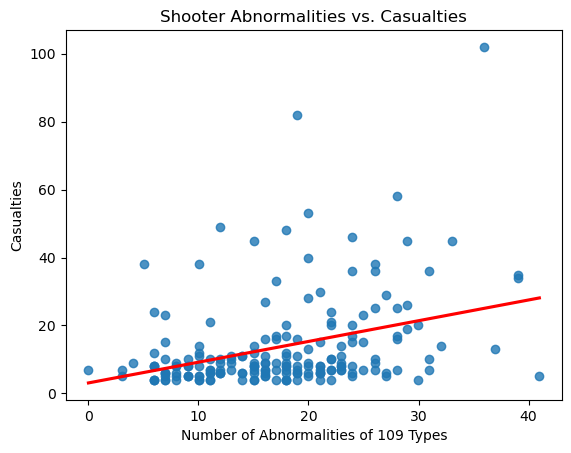

In [73]:
# 6th Visual for 'final_report.ipynb'
full = w.prepare_mass_shooters()
removed_outlier = full[full.agg_casualties != 927]
removed_outlier['agg_grand_total'] = removed_outlier['agg_grand_total'] * 109
sns.regplot(data=removed_outlier, x='agg_grand_total', y='agg_casualties', ci=0, line_kws={'color' : 'red'})
plt.title('Shooter Abnormalities vs. Casualties')
plt.xlabel('Number of Abnormalities of 109 Types')
plt.ylabel('Casualties')
plt.show()

In [74]:
# 3rd Stat for 6th visual
full = w.prepare_mass_shooters()
removed_outlier = full[full.agg_casualties != 927]
removed_outlier['agg_grand_total'] = removed_outlier['agg_grand_total'] * 109
target_binary = np.where(removed_outlier.shooter_volatility == 'High Volatility', 1, 0)
target_mean = sum(target_binary) / removed_outlier.shape[0]
non_target_mean = removed_outlier.agg_grand_total.mean()
stat, p = stats.ttest_ind_from_stats(mean1=target_mean, std1=1, nobs1=removed_outlier.shape[0],
                           mean2=non_target_mean, std2=1, nobs2=removed_outlier.shape[0],
                           equal_var=False)
if p < 0.05:
    print(f'\033[32m========== REJECT NULL HYPOTHESIS! ==========\033[0m')
    print(f'\033[35mStatistic:\033[0m {stat:.4f}')
    print(f'\033[35mP-Value:\033[0m {p:.4f}')
else:
    print(f'\033[31m========== ACCEPT NULL HYPOTHESIS! ==========\033[0m')
    print(f'\033[35mStatistic:\033[0m {stat:.4f}')
    print(f'\033[35mP-Value:\033[0m {p:.4f}')

========== REJECT NULL HYPOTHESIS! ==========
Statistic: -164.6471
P-Value: 0.0000
